In [148]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
##gender_data = pd.read_csv("/Users/pavnigairola/Desktop/Titanic Data/gender_submission.csv")
netflix_df = pd.read_csv("netflix_titles 2.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [30]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [31]:
#Cleaning The Data
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [52]:
#not related to our analysis
netflix_df.dropna['cast']

TypeError: 'method' object is not subscriptable

In [51]:
netflix_df.isnull().sum()

show_id           0
type              0
title             0
cast            718
country           0
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [55]:
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])
netflix_df

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United states,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


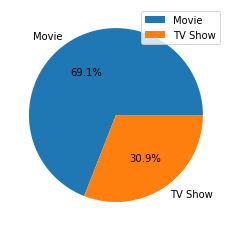

In [56]:
#Lets see the propotion TV show and Movie
plt.figure(figsize= (4,4))
percent = netflix_df['type'].value_counts()
val = percent.index
plt.pie(percent.values, labels = val,autopct="%1.1f%%")
plt.legend()
plt.show()

In [63]:
#As the proportions are as displayed, thus Movies [almost 70% of the data] are released more than TV shows as for the data gathered till 2021.
netflix_df["rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [66]:
#Narrowing down the vast categories to 4 main categories to understand the distribution. The categories are:-
#ADULTS
#TEEN
#OUTER KIDS
#KIDS
ratings_cat = {
    'TV-MA': 'Adults',
    'R': 'Adults',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'TV-PG': 'Older Kids',
    'NR': 'Adults',
    'TV-G': 'Kids',
    'TV-Y': 'Kids',
    'nan' : 'null',
    'TV-Y7': 'Older Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'NC-17': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'UR': 'Adults',
}
ratings_cat

{'TV-MA': 'Adults',
 'R': 'Adults',
 'PG-13': 'Teens',
 'TV-14': 'Teens',
 'TV-PG': 'Older Kids',
 'NR': 'Adults',
 'TV-G': 'Kids',
 'TV-Y': 'Kids',
 'nan': 'null',
 'TV-Y7': 'Older Kids',
 'PG': 'Older Kids',
 'G': 'Kids',
 'NC-17': 'Adults',
 'TV-Y7-FV': 'Older Kids',
 'UR': 'Adults'}

In [69]:
netflix_df["ratings_cat"] = netflix_df["rating"].replace(ratings_cat)
netflix_df["ratings_cat"]

0           Adults
1           Adults
2           Adults
3            Teens
4            Teens
           ...    
7782        Adults
7783         Teens
7784        Adults
7785    Older Kids
7786        Adults
Name: ratings_cat, Length: 7787, dtype: object

<Figure size 864x288 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='ratings_cat'>

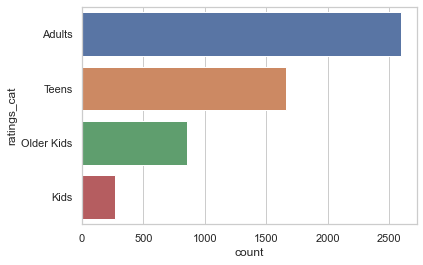

In [73]:
plt.figure(figsize = (12,4))
sns.set_theme(style="whitegrid")
plt.show()
tv = netflix_df[netflix_df['type'] == 'TV Show']
movie = netflix_df[netflix_df['type'] == 'Movie']
count = movie.groupby(['ratings_cat'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
sns.barplot(x = count['count'] , y = count['ratings_cat'])

<AxesSubplot:xlabel='ratings_cat', ylabel='release_year'>

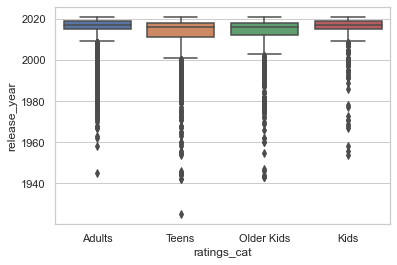

In [75]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="ratings_cat",y="release_year",data=netflix_df)

<AxesSubplot:title={'center':'RELEASE RATEs'}>

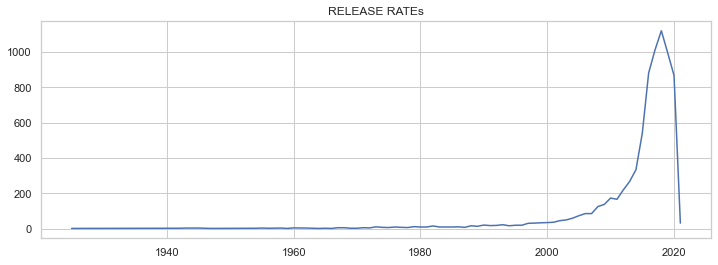

In [76]:
#That explains the focus is more on the TEENS in the span of the years. But as of in 2020 the distribution is more focused on the KIDS and ADULTS.
plt.figure(figsize = (12,4))
rate_count = netflix_df['release_year'].value_counts()
plt.title("RELEASE RATEs")
sns.lineplot(x =rate_count.index , y= rate_count.values)

<AxesSubplot:title={'center':'RELEASE RATE BETWEEN 2000 TO 2021'}>

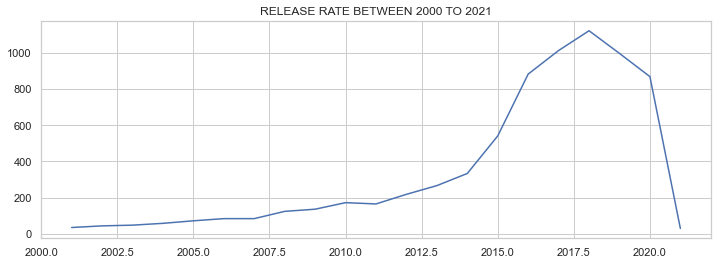

In [77]:
plt.figure(figsize= (12,4))
lastdec = rate_count.loc[rate_count.index > 2000]
plt.title("RELEASE RATE BETWEEN 2000 TO 2021")
sns.lineplot(x = lastdec.index , y= lastdec.values)

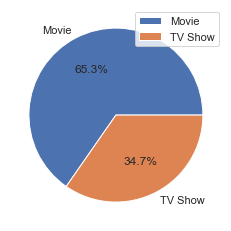

In [78]:
#Here we can see major release started from 2012 and in 2017 there was surge in release.
#Lets see what type was more prominent in recent years where release was highest...
plt.figure(figsize = (4,4))
data_lastdec = netflix_df.loc[netflix_df['release_year'] > 2012]
data_lastdec_count = data_lastdec['type'].value_counts()
plt.pie(data_lastdec_count.values ,labels = data_lastdec_count.index,autopct="%1.1f%%")
plt.legend()
plt.show()

<AxesSubplot:xlabel='count', ylabel='ratings_cat'>

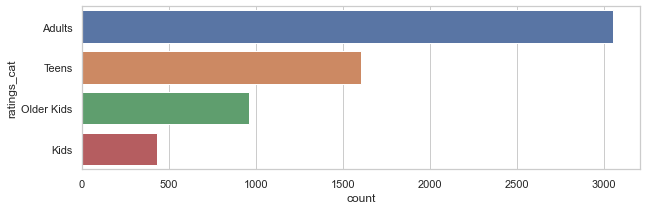

In [79]:
#So, we see that from year 2012 to 2021 the Movies were more frequently released than TV shows.
#Lets see what categories were most released in these years...
plt.figure(figsize =(10,3))
count = data_lastdec.groupby(['ratings_cat'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
sns.barplot(x = count['count'] , y = count['ratings_cat'])


<AxesSubplot:title={'center':'RATINGS WITH HIGHEST NUMBER OF MOVIES RELEASED'}, xlabel='count', ylabel='ratings_cat'>

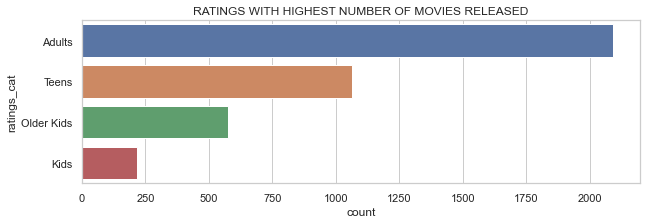

In [80]:
#The ADULT categories were prominent from 2012 to present year. Lets see what categories in movies were prominent as they where the one with most releases.
plt.figure(figsize =(10,3))
data_lastdec_movie = data_lastdec.loc[data_lastdec['type'] == 'Movie']
count = data_lastdec_movie.groupby(['ratings_cat'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
plt.title("RATINGS WITH HIGHEST NUMBER OF MOVIES RELEASED")
sns.barplot(x = count['count'] , y = count['ratings_cat'])

<Figure size 1080x360 with 0 Axes>

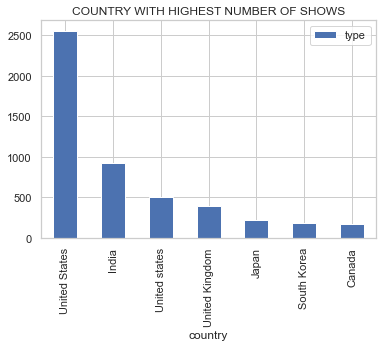

In [82]:
#And again we can check that the same category(ADULT) was the one in which most movies where released from 2012 till now..
plt.figure(figsize = (15,5))
sns.set_theme(style="whitegrid")
country_count = pd.crosstab(netflix_df["country"],["type"]).sort_values(by = 'type',ascending=False )
country_count.head(7).plot(kind="bar")
plt.legend()
plt.title("COUNTRY WITH HIGHEST NUMBER OF SHOWS")
plt.show()

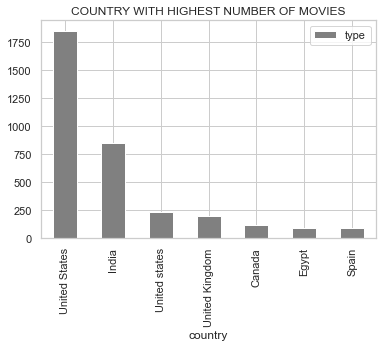

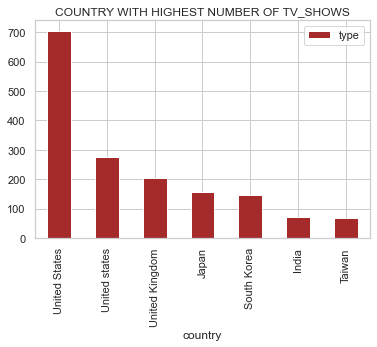

In [83]:
#Here we can see overall United States does have most shows under its belt followed by India. Lets check how the type of shows are distributed country wise...

country_count = pd.crosstab(movie["country"],["type"]).sort_values(by = 'type',ascending=False )
country_count.head(7).plot(kind="bar",color ="grey")
plt.legend()
plt.title("COUNTRY WITH HIGHEST NUMBER OF MOVIES")
plt.show()

country_count = pd.crosstab(tv["country"],["type"]).sort_values(by = 'type',ascending=False )
country_count.head(7).plot(kind="bar",color ="brown")
plt.legend()
plt.title("COUNTRY WITH HIGHEST NUMBER OF TV_SHOWS")
plt.show()

Text(0.5, 1.0, 'DURATION OF TV')

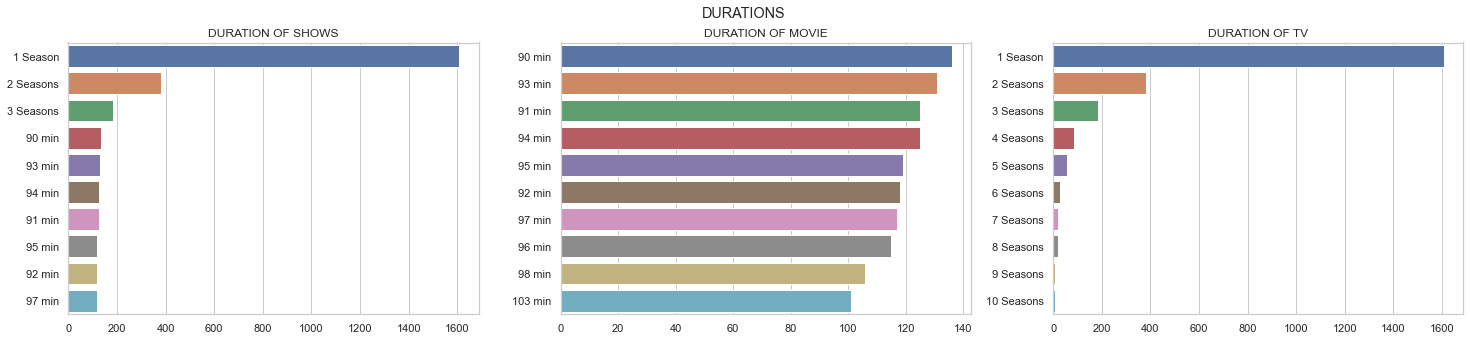

In [85]:
#So, we can see that US has both types under its belt with most releases, whereas the followed up country varied. But overall US and India has the base in releasing frequency.
fig, axs = plt.subplots(1,3,figsize = (25,5))
fig.suptitle("DURATIONS")
gen_dur = netflix_df["duration"].value_counts().head(10)
sns.barplot(ax = axs[0], x = gen_dur.values, y = gen_dur.index)
axs[0].set_title('DURATION OF SHOWS')
movie_dur = movie["duration"].value_counts().head(10)
sns.barplot(ax = axs[1], x = movie_dur.values, y =  movie_dur.index)
axs[1].set_title('DURATION OF MOVIE')
tv_dur = tv["duration"].value_counts().head(10)
sns.barplot(ax = axs[2], x = tv_dur.values, y = tv_dur.index)
axs[2].set_title('DURATION OF TV')

[Text(0.5, 1.0, 'COUNT OF TV SHOWS AND MOVIES ON NETFLIX')]

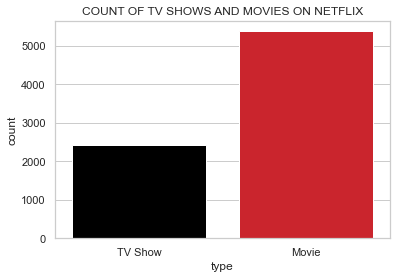

In [90]:
#bar chart showing the count of TV Shows and Movies on netflix platform
sns.countplot(x=netflix_df['type'], data= netflix_df,palette=["#000000",'#E50914']).set(title='COUNT OF TV SHOWS AND MOVIES ON NETFLIX')

In [116]:
#create a data frame having years in chronological order
df= pd.DataFrame({'release_year':np.sort(netflix_df['release_year'].unique())})
df

,release_year
0,1925
1,1942
2,1943
3,1944
4,1945
...,...
68,2017
69,2018
70,2019
71,2020


In [117]:
#create separate list for movies and tv shows containing their frequencies according to years. 
movie_count=[]
for i in np.sort(netflix_df['release_year'].unique()):
    movie_count.append(np.argwhere((netflix_df['release_year'].to_numpy()==i)&(netflix_df['type'].to_numpy()=='Movie')).shape[0])
tvshow_count=[]
for i in np.sort(netflix_df['release_year'].unique()):
    tvshow_count.append(np.argwhere((netflix_df['release_year'].to_numpy()==i)&(netflix_df['type'].to_numpy()=='TV Show')).shape[0])

In [124]:
#add the newly made columns to the dataframe
df= pd.DataFrame({'Year':np.sort(netflix_df['release_year'].unique())})
df['Tv Show']=tvshow_count
df['Movie']=movie_count
plot=df
plot

,Year,Tv Show,Movie
0,1925,1,0
1,1942,0,2
2,1943,0,3
3,1944,0,3
4,1945,0,3
...,...,...,...
68,2017,268,744
69,2018,387,734
70,2019,414,582
71,2020,457,411


<ipython-input-130-5b081b5b357a>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("YEARLY TREND OF MOVIES AND TV SHOWS ON NETFLIX",FONTSIZE=15)


Text(0, 0.5, 'FREQUENCY')

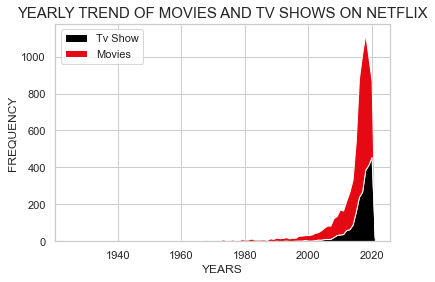

In [130]:
#create a stacked area chart depicting the yearly trend of Movies and TV Shows on netflix.
plt.stackplot(plot['Year'],plot['Tv Show'],plot['Movie'], colors =["#000000",'#E50914'])
plt.legend(labels=['Tv Show','Movies'], loc="upper left")
plt.title("YEARLY TREND OF MOVIES AND TV SHOWS ON NETFLIX",FONTSIZE=15)
plt.xlabel("YEARS")
plt.ylabel("FREQUENCY")

In [140]:
#The graph shows that Netflix released a lot of Movies between the year 2017-2020 on its platform. The number of TV shows also increased for Netflix users. However, 2018 onwards, the growth in number of TV Shows is more when compared to Movies, showing an increasing trend of binge watching.
#top 5 TV Shows genres on netflix on the basis of their appearance
tv_genre=[]
for i in range(netflix_df["listed_in"].shape[0]):
    if netflix_df["type"][i]=="TV Show":
        a=str(netflix_df["listed_in"][i]).split(",")
        for j in range(len(a)):
            a[j]=a[j].lstrip()
        tv_genre+=a
top_tv_genre=pd.Series(tv_genre)
top_tv_genre.value_counts().head(5)

International TV Shows    1199
TV Dramas                  704
TV Comedies                525
Crime TV Shows             427
Kids' TV                   414
dtype: int64

In [142]:
#top 5 Movies genres on netflix on the basis of their appearance
movie_genre=[]
for i in range(netflix_df["listed_in"].shape[0]):
    if netflix_df["type"][i]=="Movie":
        b=str(netflix_df["listed_in"][i]).split(",")
        for j in range(len(b)):
            b[j]=b[j].lstrip()
        movie_genre+=b
top_movie_genre=pd.Series(movie_genre)
top_movie_genre.value_counts().head(5)

International Movies    2437
Dramas                  2106
Comedies                1471
Documentaries            786
Action & Adventure       721
dtype: int64

In [144]:
#top 5 Movies genres on netflix on the basis of their appearance
#Drama & Comedy remains among the top Genre on Netflix in terms of volume of content.
#top 10 actors on netflix on the basis of their appearance
actors=[]
for i in range(netflix_df["cast"].shape[0]):
    c=str(netflix_df["cast"][i]).split(",")
    actors+=c
top_actors=pd.Series(actors)
top_actors.value_counts().head(11)

nan                  718
 Anupam Kher          38
 Takahiro Sakurai     28
 Om Puri              27
Shah Rukh Khan        27
 Boman Irani          25
 Andrea Libman        24
 Paresh Rawal         24
 Yuki Kaji            23
 Vincent Tong         22
Akshay Kumar          22
dtype: int64

In [147]:
#top 10 directors on netflix on the basis of their appearances
directors=[]
for i in range(netflix_df["country"].shape[0]):
    d=str(netflix_df["country"][i]).split(",")
    directors+=d
top_directors=pd.Series(directors)
top_directors.value_counts().head(11)

United States     2883
India              956
United Kingdom     577
United states      507
 United States     414
Canada             259
Japan              237
France             196
South Korea        194
Spain              168
 France            153
dtype: int64